<a href="https://colab.research.google.com/github/syedghazihaider/LAB-assaingment-/blob/main/LAB6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wdbc.xlsx to wdbc.xlsx


Head of the dataset:
         ID Diagnosis  Mean Radius  Mean Texture  Mean Perimeter  Mean Area  \
0    842517         M        20.57         17.77          132.90     1326.0   
1  84300903         M        19.69         21.25          130.00     1203.0   
2  84348301         M        11.42         20.38           77.58      386.1   
3  84358402         M        20.29         14.34          135.10     1297.0   
4    843786         M        12.45         15.70           82.57      477.1   

   Mean Smoothness  Mean Compactness  Mean Concavity  Mean Concave Points  \
0          0.08474           0.07864          0.0869              0.07017   
1          0.10960           0.15990          0.1974              0.12790   
2          0.14250           0.28390          0.2414              0.10520   
3          0.10030           0.13280          0.1980              0.10430   
4          0.12780           0.17000          0.1578              0.08089   

   ...  Worst Radius  Worst Texture  Wors

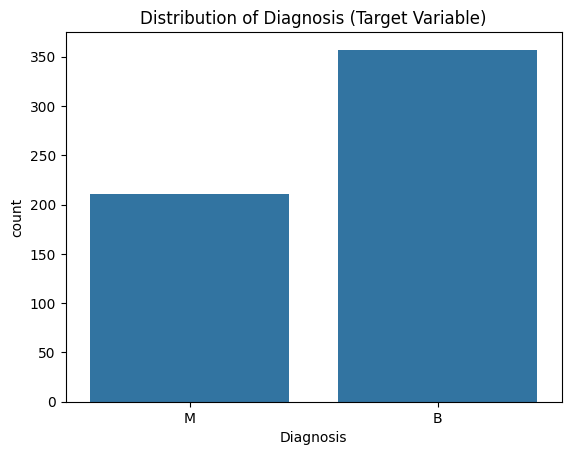


Distribution of the target variable:


KeyError: 'diagnosis'

In [ ]:
# Install required libraries (if not already installed)
!pip install openpyxl seaborn

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('wdbc.xlsx')

# a. Head and Tail of the Dataset
print("Head of the dataset:")
print(df.head())
print("\nTail of the dataset:")
print(df.tail())

# b. Datatype of Each Feature
print("\nData types of each feature:")
print(df.dtypes)

# c. Missing Values
print("\nMissing values in each column:")
print(df.isnull().sum())

# d. Column Names
print("\nColumn names:")
print(df.columns.tolist())

# e. Unique values of the target column (assumed to be 'diagnosis')
# e. Unique values of the target column (corrected to match actual column name)
print("\nUnique values in the target column (Diagnosis):")
print(df['Diagnosis'].unique())

# f. Distribution of the target variable (corrected)
print("\nDistribution of the target variable:")
print(df['Diagnosis'].value_counts())
sns.countplot(x='Diagnosis', data=df)
plt.title("Distribution of Diagnosis (Target Variable)")
plt.show()


# f. Distribution of the target variable
print("\nDistribution of the target variable:")
print(df['diagnosis'].value_counts())
sns.countplot(x='diagnosis', data=df)
plt.title("Distribution of Diagnosis (Target Variable)")
plt.show()

# g. Histogram of all numeric features
df.drop(['ID'], axis=1, inplace=True)  # Dropping ID as it's not useful for EDA
df.hist(figsize=(20, 15), bins=30)
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

# h. Box plots to check for outliers
plt.figure(figsize=(20, 30))
for i, col in enumerate(df.select_dtypes(include='number').columns, 1):
    plt.subplot(8, 4, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# i. SVM Variant Decision
print("\nSVM Variant Suggestion:")
print("""
Based on the box plots, if we observe outliers in the data, a **Soft Margin SVM** is more appropriate.
Soft margin SVM allows some misclassifications or violations of the margin to prevent overfitting,
which is crucial when the data contains noise or outliers. Hard margin SVM would try to perfectly
separate the classes, which is unrealistic and can lead to poor generalization when outliers are present.
""")



Unique values in the target column (Diagnosis):
['M' 'B']

Distribution of the target variable:
Diagnosis
B    357
M    211
Name: count, dtype: int64


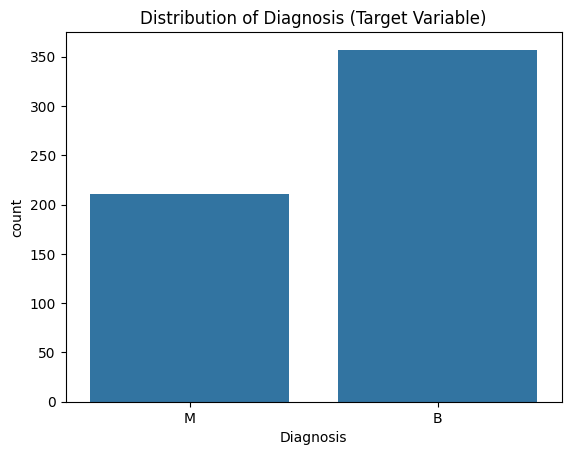

In [ ]:
# e. Unique values of the target column (corrected to match actual column name)
print("\nUnique values in the target column (Diagnosis):")
print(df['Diagnosis'].unique())

# f. Distribution of the target variable (corrected)
print("\nDistribution of the target variable:")
print(df['Diagnosis'].value_counts())
sns.countplot(x='Diagnosis', data=df)
plt.title("Distribution of Diagnosis (Target Variable)")
plt.show()


In [ ]:
df = pd.read_excel('wdbc.xlsx')
df.columns = df.columns.str.strip().str.lower()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # M=1, B=0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Train SVM
model = SVC()
model.fit(X_train, y_train)

# Accuracy
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy : {test_accuracy:.4f}")

Training Accuracy: 0.9899
Testing Accuracy : 0.9766


Shape of Features (X): (568, 30)
Shape of Target (y): (568,)

Train/Test split shapes:
X_train: (397, 30)
X_test : (171, 30)
y_train: (397,)
y_test : (171,)

Training Accuracy: 0.9899
Testing Accuracy : 0.9766
The model generalizes well. No clear sign of overfitting or underfitting.

Overfitting: The model memorizes training data, performs poorly on unseen data.
- Signs: Very high training accuracy, low testing accuracy.

Underfitting: The model is too simple to learn patterns in data.
- Signs: Low accuracy on both training and testing data.



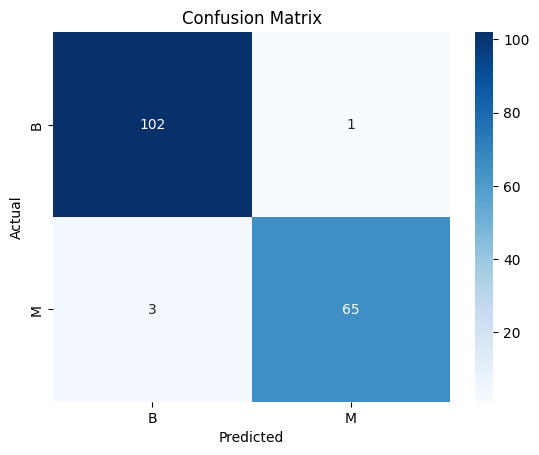


Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98       103
           M       0.98      0.96      0.97        68

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
df.columns = df.columns.str.strip().str.lower()

# 2. Split dataset into features and target
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']
print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)

# 3. Normalize the dataset (Standard Scaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Encode the target variable (M = 1, B = 0)
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # M=1, B=0

# 5. Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.3, random_state=42
)

print("\nTrain/Test split shapes:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

# 6. Train SVM with default parameters
model = SVC()
model.fit(X_train, y_train)

# 7. Evaluate accuracy
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy : {test_accuracy:.4f}")

# 8. Interpretation of fit
if abs(train_accuracy - test_accuracy) < 0.05:
    print("The model generalizes well. No clear sign of overfitting or underfitting.")
elif train_accuracy > test_accuracy:
    print("Possible Overfitting: High train accuracy, lower test accuracy.")
else:
    print("Possible Underfitting: Low train accuracy and test accuracy.")

# 9. Explain Overfitting and Underfitting
print("""
Overfitting: The model memorizes training data, performs poorly on unseen data.
- Signs: Very high training accuracy, low testing accuracy.

Underfitting: The model is too simple to learn patterns in data.
- Signs: Low accuracy on both training and testing data.
""")

# 10. Confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 11. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
